# Linear Regression

Linear Regression model prediction
y = θ 0 + θ 1 x 1 + θ 2 x 2 + ⋯ + θ n x n
• ŷ is the predicted value.
• n is the number of features.
• x i is the i th feature value.
• θ j is the j th model parameter (including the bias term θ 0 and the feature weights
θ 1 , θ 2 , ⋯, θ n ).
It is often the case that a learning algorithm will try to optimize a different function than the performance
measure used to evaluate the final model. This is generally because that function is easier to compute, because
it has useful differentiation properties that the performance measure lacks, or because we want to constrain
the model during training, as we will see when we discuss regularization.


# The Normal Equation

In [98]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)


In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.24391756]), array([[2.95006639]]))

In [15]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[ 4.24391756],
       [10.14405034]])

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


In [29]:
X_test = np.linspace(0,2,100).reshape(-1,1)
#X_test.shape
y_test = lin_reg.predict(X_test)

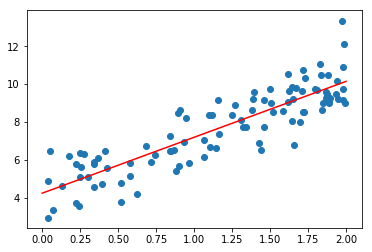

In [30]:
plt.scatter(X,y)
plt.plot(X_test,y_test,color='red')
plt.show()

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

# Stochastic Gradient Descent

In [31]:
from sklearn.linear_model import SGDRegressor


In [33]:
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [34]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21785165]), array([2.90377894]))

# Polynomial Regression

In [91]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 +X+2+np.random.randn(m,1)


In [75]:
from sklearn.preprocessing import PolynomialFeatures
X.shape

(100, 1)

In [38]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.50382116])

In [41]:
X_poly[0]

array([1.50382116, 2.26147808])

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.88250625]), array([[0.94737723, 0.48533122]]))

In [82]:
X_poly_test = np.linspace(-3,3,100)[:,np.newaxis]
#X_poly_test.shape
X_poly_test1 = poly_features.fit_transform(X_poly_test)


In [81]:
y_ply_test = lin_reg.predict(X_poly_test1)

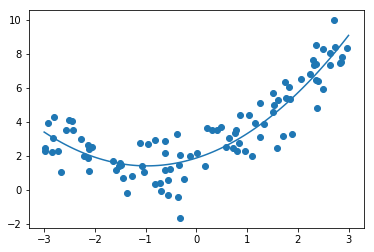

In [83]:
plt.scatter(X,y)
plt.plot(X_poly_test,y_ply_test)
plt.show()

# learning curves

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [96]:
def plot_learning_curve(model,X,y):
    
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    
    train_errors,val_errors = [],[]
    
    for m in range(1,len(X_train)):
        
        model.fit(X_train[:m],y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim(0,3)
    

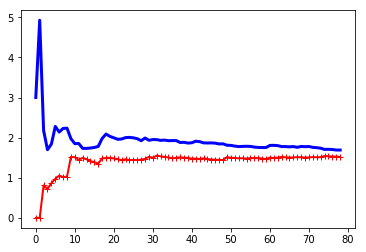

In [92]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

In [86]:
from sklearn.pipeline import Pipeline

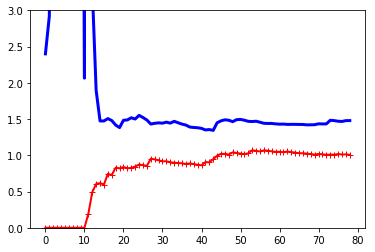

In [99]:
polynomial_regression = Pipeline((
    
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg", LinearRegression()),
))

plot_learning_curve(polynomial_regression,X,y)


# Regularized Linear Models
## Ridge Regression

It is important to scale the data (e.g., using a StandardScaler )
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

In [100]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.39403052]])

In [101]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([8.10312016])

# Elastic Net

In [102]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([8.14143605])

# Early Stopping

In [104]:
from sklearn.base import clone

In [106]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=1,warm_start = True,penalty=None,
                       learning_rate='constant',eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)#continues where it left off
    
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    
    if val_error < minimum_val_error:
        
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined